# Introduction : Corona Virus

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).The disease was first identified in December 2019 in Wuhan, the capital of China's Hubei province, and has since spread globally, resulting in the ongoing 2019–20 coronavirus pandemic.Common symptoms include fever, cough, and shortness of breath.Other symptoms may include muscle pain, sputum production, diarrhea, sore throat, loss of smell, and abdominal pain. While the majority of cases result in mild symptoms, some progress to viral pneumonia and multi-organ failure.

# Data:

Cumulative count of confirmed, death and recovered cases of COVID-19 from different countries from 22nd January 2020 to 23rd March 2020 https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

# Importing required packages and the data

In [1]:
import pandas as pd #for data preprocessing
import numpy as np #To perform numerical operations

In [2]:
data = pd.read_csv("covid_19_clean_complete.csv")

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


# Exploratory Data Analysis

In [4]:
#Size of the dataset
data.shape

(16884, 8)

In [5]:
#To view the different columns in our dataset along with the datatype and no of null null observations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16884 entries, 0 to 16883
Data columns (total 8 columns):
Province/State    5226 non-null object
Country/Region    16884 non-null object
Lat               16884 non-null float64
Long              16884 non-null float64
Date              16884 non-null object
Confirmed         16884 non-null int64
Deaths            16884 non-null int64
Recovered         16884 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB


In [6]:
#Gives statistical details of all the numerical columns
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000
mean,22.238772,23.356497,488.386283,18.975539,153.673182
std,24.364505,71.494673,4531.202523,247.439235,2208.252328
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,8.599125,-20.026050,0.000000,0.000000,0.000000
50%,23.914900,20.921188,0.000000,0.000000,0.000000
75%,41.316075,85.953175,24.000000,0.000000,1.000000
max,71.706900,178.065000,121478.000000,10023.000000,62098.000000


In [7]:
#To view the no of null observations in the Province/State column
data['Province/State'].isnull().sum()

11658

In [8]:
data.shape[0]

16884

In [9]:
#To view the percentage of null values in the Province/State column
(data['Province/State'].isnull().sum()/data.shape[0])*100

69.04761904761905

In [10]:
#To view all the distinct countries present in our dataset
data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [11]:
#To view the number of uniques countries in our dataset
data['Country/Region'].nunique()

177

In [12]:
#To view the time frame considered in this dataset
data['Date'].unique()

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20'], dtype=object)

In [13]:
#No of days in total considered
data['Date'].nunique()

67

# Feature Extraction

In [14]:
type(data['Date'][0])

str

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data['month'] = data['Date'].dt.month

In [17]:
data['day'] = data['Date'].dt.day

In [18]:
data['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [19]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,1,22
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,1,22
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,1,22
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,1,22
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,1,22


In [20]:
#Creating the continent column in our dataset

In [21]:
africa = ['Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina Faso',
'Burundi',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad'
'Comoros',
'Republic of the Congo',
'Democratic Republic of the Congo',
"Côte d'Ivoire",
'Djibouti',
'Egypt',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'The Gambia',
'Ghana',
'Guinea',
'Guinea',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Senegal',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Western Sahara',
'Zambia',
'Zimbabwe']

In [22]:
asia = ['Afghanistan',
'Armenia',
'Azerbaijan',
'Bahrain',
'Bangladesh',
'Bhutan',
'Brunei',
'Cambodia',
'China',
'Cyprus',
'East Timor',
'Georgia',
'India',
'Indonesia',
'Iran',
'Iraq',
'Israel',
'Japan',
'Jordan',
'Kazakhstan',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Lebanon',
'Malaysia',
'Maldives',
'Mongolia',
'Myanmar',
'Nepal',
'North Korea',
'Oman',
'Pakistan',
'Palestine',
'Philippines',
'Qatar',
'Russia',
'Saudi Arabia',
'Singapore',
'South Korea',
'Sri Lanka',
'Syria',
'Tajikistan',
'Thailand',
'Turkey',
'Turkmenistan',
'Taiwan',
'United Arab Emirates',
'Uzbekistan',
'Vietnam',
'Yemen']

In [23]:
europe = ['Albania',
'Andorra',
'Austria',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Czech Republic',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Iceland',
'Republic of Ireland',
'Italy',
'Kosovo',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'North Macedonia',
'Malta',
'Moldova',
'Monaco',
'Montenegro',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Romania',
'Russia',
'San Marino',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom',
'Vatican City']

In [24]:
north_amercia = ['Antigua and Barbuda',
'Anguilla',
'Aruba',
'The Bahamas',
'Barbados',
'Belize',
'Bermuda',
'Bonaire',
'British Virgin Islands',
'Canada',
'Cayman Islands',
'Clipperton Island',
'Costa Rica',
'Cuba',
'Curaçao',
'Dominica',
'Dominican Republic',
'El Salvador',
'Greenland',
'Grenada',
'Guadeloupe',
'Guatemala',
'Haiti',
'Honduras',
'Jamaica',
'Martinique',
'Mexico',
'Montserrat',
'Navassa Island',
'Nicaragua',
'Panama',
'Puerto Rico',
'Saba',
'Saint Barthelemy',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Martin',
'Saint Pierre and Miquelon',
'Saint Vincent and the Grenadines',
'Sint Eustatius',
'Sint Maarten',
'Trinidad and Tobago - Port of Spain',
'Turks and Caicos',
'USA',
'US']

In [25]:
south_america = ['Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'Falkland Islands',
'French Guiana',
'Guyana',
'Paraguay',
'Peru',
'South Georgia and the South Sandwich Islands',
'Suriname',
'Uruguay',
'Venezuela']

In [26]:
australia= ['Australia',
'Federated States of Micronesia',
'Fiji',
'Kiribati',
'Marshall Islands',
'Nauru',
'New Zealand',
'Palau',
'Papua New Guinea',
'Samoa',
'Solomon Islands',
'Tonga',
'Tuvalu',
'Vanuatu',
'Australia',
'Flores',
'Lombok',
'Melanesia',
'New Caledonia',
'New Guinea',
'Sulawesi',
'Sumbawa',
'Timor']

In [27]:
lst = []
for i in data["Country/Region"]:
    if(i in asia):
        lst.append("Asia")
    elif(i in africa):
        lst.append("Africa")
    elif(i in europe):
        lst.append("Europe")
    elif(i in north_amercia):
        lst.append('North America')
    elif(i in south_america):
        lst.append('South America')
    else:
        lst.append("Australia")

In [28]:
data['Continent'] = lst

In [29]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day,Continent
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,1,22,Asia
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,1,22,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,1,22,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,1,22,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,1,22,Africa


In [30]:
lst = data['Province/State'].unique()
lst = list(lst)
lst.pop(0)
lst = lst

In [31]:
lst

['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Islands',
 '

In [34]:
j = 0
d = {}
c= 0
for i in data["Province/State"]:
    if(i not in lst):
        d[c] =data.iloc[j]
        c= c+1
    j = j+1


In [47]:
d.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day,Continent
0,NaN,Afghanistan,33,65,2020-01-22 00:00:00,0,0,0,1,22,Asia
1,NaN,Albania,41.1533,20.1683,2020-01-22 00:00:00,0,0,0,1,22,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22 00:00:00,0,0,0,1,22,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22 00:00:00,0,0,0,1,22,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22 00:00:00,0,0,0,1,22,Africa


In [49]:
d.groupby(["Country/Region"]).agg({"Confirmed":'max'}).reset_index().groupby("Country/Region").agg({"Confirmed":'sum'})

,Confirmed
Country/Region,
Afghanistan,110
Albania,197
Algeria,454
Andorra,308
Angola,5
Antigua and Barbuda,7
Argentina,690
Armenia,407
Austria,8271


In [32]:
data[data['Country/Region']== 'Netherlands']["Confirmed"].max()

9762

In [36]:
#Here we can identify that the only for Canada, Australia and China the results are wrong and for the rest the results matched the number from reports in Wikipedia.Hence seperating the dataset into two parts as data1(Rest of the countries) and data2(Canada, Australia and China) for analysis

In [33]:
data.columns = [i.split("/")[0] for i in data.columns]

In [ ]:
#Splitting the dataset

In [34]:
data1 = data.query("Country != ['Canada','Australia','China']")

In [37]:
data[data['Country'] == "China"].groupby("Province").agg({"Confirmed":'max'})

,Confirmed
Province,
Anhui,990
Beijing,573
Chongqing,578
Fujian,337
Gansu,136
Guangdong,1467
Guangxi,254
Guizhou,147
Hainan,168


In [ ]:
#Total number of cases country wise from 22-Jan to 28th- Mar

In [39]:
no_of_confirmed_cases = data1.groupby("Country").agg({"Confirmed":'max'})

In [40]:
no_of_confirmed_cases1 = no_of_confirmed_cases.reset_index()

In [41]:
data2 = data.query("(Country == ['Canada','Australia','China'])")

In [42]:
no_of_confirmed_cases2 = data2.groupby(["Country","Province"]).agg({"Confirmed":'max'}).reset_index().groupby("Country").agg({"Confirmed":"sum"}).reset_index()

In [43]:
no_of_confirmed_cases = pd.concat((no_of_confirmed_cases1,no_of_confirmed_cases2),axis = 0)

In [44]:
no_of_confirmed_cases.sort_values(by = 'Confirmed',ascending = False).set_index('Country').head(20)

,Confirmed
Country,
US,121478
Italy,92472
China,82000
Spain,73235
Germany,57695
France,37575
Iran,35408
United Kingdom,17089
Switzerland,14076


In [ ]:
#Total number of confirmed cases as of 28th March across all countries

In [45]:
no_of_confirmed_cases["Confirmed"].sum()

659744

# Country wise confirmed cases visualization

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'No of Confirmed Cases Country wise(Top 20)')

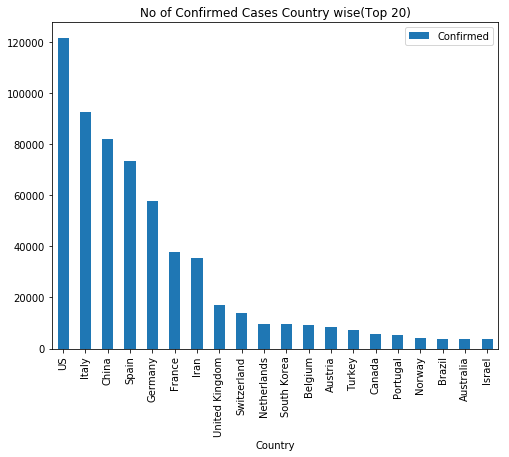

In [47]:
no_of_confirmed_cases_head = no_of_confirmed_cases.sort_values(by = 'Confirmed',ascending = False).set_index('Country').head(20)
no_of_confirmed_cases_head.plot(kind = 'bar',figsize = (8,6))
plt.title("No of Confirmed Cases Country wise(Top 20)")

In [52]:
#Total number of deaths country wise

In [48]:
no_of_deaths_country_wise1 = data1.groupby("Country").agg({"Deaths":"max"}).sort_values(by = 'Deaths', ascending = False)

In [49]:
no_of_deaths_country_wise2 = data2.groupby(["Country","Province"]).agg({"Deaths":'max'}).reset_index().groupby("Country").agg({"Deaths":"sum"})

In [50]:
no_of_deaths_country_wise = pd.concat((no_of_deaths_country_wise1,no_of_deaths_country_wise2), axis = 0)

In [51]:
no_of_deaths_country_wise.sort_values(by = "Deaths", ascending = False).head(10)

,Deaths
Country,
Italy,10023
Spain,5982
China,3299
Iran,2517
France,2314
US,2026
United Kingdom,1019
Netherlands,639
Germany,433


In [ ]:
#Total number of deaths across all countries as of 28th March

In [53]:
no_of_deaths_country_wise.Deaths.sum()

30652

# Country wise no of deaths visualization(Top 10)

Text(0.5, 1.0, 'Country wise number of deaths(Top Ten)')

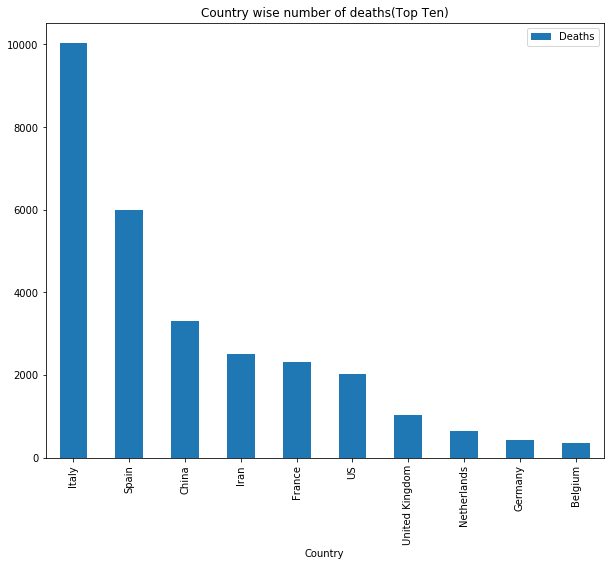

In [54]:
no_of_deaths_country_wise.sort_values(by = "Deaths", ascending = False).head(10).plot(kind = 'bar', figsize = (10,8))
plt.title("Country wise number of deaths(Top Ten)")

In [ ]:
#Creating a new dataframe total_stats conbining the results of the above insights

In [69]:
total_stats = pd.merge(no_of_confirmed_cases,no_of_deaths_country_wise,on = 'Country')

In [70]:
total_stats = total_stats.sort_values(by = "Confirmed", ascending = False)

In [ ]:
#Total number of recovered cases country wise

In [57]:
no_of_recovered_countrywise_1 = data1.groupby("Country").agg({"Recovered":"max"}).sort_values(by = 'Recovered', ascending = False) 

In [58]:
no_of_recovered_country_wise2 = data2.groupby(["Country","Province"]).agg({"Recovered":'max'}).reset_index().groupby("Country").agg({"Recovered":"sum"})

In [59]:
no_of_recovered = pd.concat((no_of_recovered_countrywise_1,no_of_recovered_country_wise2), axis =0)

In [60]:
no_of_recovered = no_of_recovered.sort_values(by = 'Recovered', ascending = False)

In [61]:
no_of_recovered.head()

,Recovered
Country,
China,75100
Italy,12384
Spain,12285
Iran,11679
Germany,8481


In [ ]:
#Total number of recovered cases across all countries

In [62]:
no_of_recovered['Recovered'].sum()

138966

# Country wise recovered cases visualization

Text(0.5, 1.0, 'Country wise recovered cases(Top Ten)')

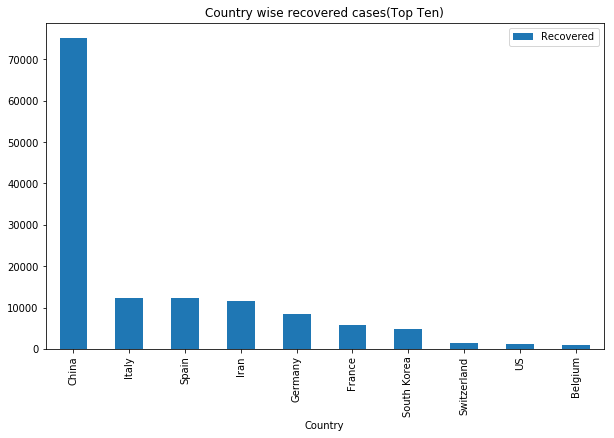

In [63]:
no_of_recovered.head(10).plot(kind= 'bar', figsize = (10,6))
plt.title("Country wise recovered cases(Top Ten)")

# Country wise statistics about the number of cases confirmed, deaths, recovered, death_percent, recovered_percent

In [71]:
total_stats = pd.merge(total_stats,no_of_recovered, on = "Country").set_index("Country")

In [72]:
total_stats.head(20)

,Confirmed,Deaths,Recovered
Country,,,
US,121478,2026,1072
Italy,92472,10023,12384
China,82000,3299,75100
Spain,73235,5982,12285
Germany,57695,433,8481
France,37575,2314,5700
Iran,35408,2517,11679
United Kingdom,17089,1019,135
Switzerland,14076,264,1530


In [73]:
total_stats['Death_Percent'] = (total_stats['Deaths']/total_stats['Confirmed'])*100

In [74]:
total_stats['Recovered_Percentage'] = (total_stats['Recovered']/total_stats['Confirmed'])*100

In [75]:
total_stats.head()

,Confirmed,Deaths,Recovered,Death_Percent,Recovered_Percentage
Country,,,,,
US,121478,2026,1072,1.667792,0.882464
Italy,92472,10023,12384,10.838957,13.392162
China,82000,3299,75100,4.023171,91.585366
Spain,73235,5982,12285,8.168226,16.774766
Germany,57695,433,8481,0.750498,14.699714


In [78]:
total_stats.reset_index()[['Country','Death_Percent']].sort_values(by = "Death_Percent", ascending = False).head(20)

,Country,Death_Percent
168,Gambia,33.333333
160,Nicaragua,25.000000
158,Cabo Verde,20.000000
154,Sudan,20.000000
148,Zimbabwe,14.285714
147,Gabon,14.285714
1,Italy,10.838957
115,Bangladesh,10.416667
135,Niger,10.000000
81,San Marino,9.821429


# Country wise death percentage visualization

Text(0.5, 1.0, 'Country wise death percentage(Top Ten)')

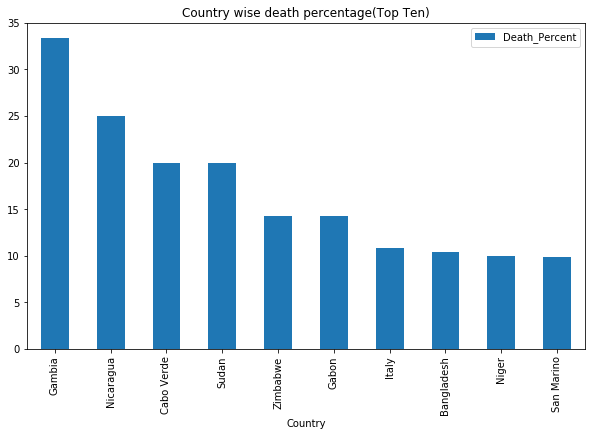

In [80]:
total_stats.reset_index()[['Country','Death_Percent']].set_index("Country").sort_values(by = "Death_Percent", ascending = False).head(10).plot(kind= 'bar',figsize = (10,6))
plt.title("Country wise death percentage(Top Ten)")

In [ ]:
#To understand the distribution of death and recovered percentage across various countries

In [81]:
total_stats.Death_Percent.describe()

count    177.000000
mean       2.351449
std        4.431895
min        0.000000
25%        0.000000
50%        0.822150
75%        2.631579
max       33.333333
Name: Death_Percent, dtype: float64

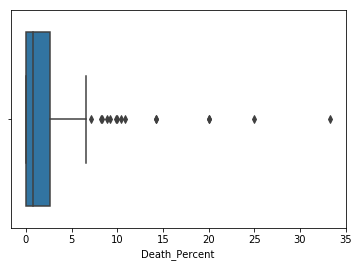

In [82]:
import seaborn as sb
sb.boxplot(data = total_stats, x=total_stats['Death_Percent'])

In [84]:
total_stats.Recovered_Percentage.describe()

count    177.000000
mean       7.774442
std       15.110498
min        0.000000
25%        0.000000
50%        1.937984
75%        9.573003
max      100.000000
Name: Recovered_Percentage, dtype: float64

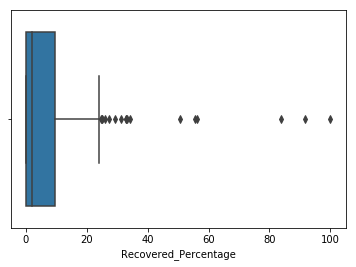

In [85]:
sb.boxplot(data = total_stats, x=total_stats['Recovered_Percentage'])

# Total number of Confirmed cases continent wise

In [85]:
no_of_confirmed_cases_continent_wise1 =data1.groupby(["Continent",'Country']).agg({"Confirmed":"max"}).reset_index().groupby("Continent").agg({"Confirmed":"sum"}).sort_values(by = 'Confirmed', ascending = False)

In [86]:
no_of_confirmed_cases_continent_wise2 = data2.groupby(['Continent',"Province"]).agg({"Confirmed":"max"}).reset_index().groupby("Continent").agg({"Confirmed":"sum"}).sort_values(by = "Confirmed", ascending = False)
no_of_confirmed_cases_continent_wise1

,Confirmed
Continent,
Europe,348895
North America,124363
Asia,74192
South America,10156
Australia,6889
Africa,4033


In [87]:
no_of_confirmed_cases_continent_wise = pd.concat((no_of_confirmed_cases_continent_wise1,no_of_confirmed_cases_continent_wise2), axis =0)

In [88]:
no_of_confirmed_cases_continent_wise = no_of_confirmed_cases_continent_wise.groupby("Continent").agg({"Confirmed":'sum'}).sort_values(by = "Confirmed", ascending = False)
no_of_confirmed_cases_continent_wise

,Confirmed
Continent,
Europe,348895
Asia,156192
North America,129939
Australia,10529
South America,10156
Africa,4033


# Total number of confirmed cases continent wise visualization

In [89]:
import seaborn as sb

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

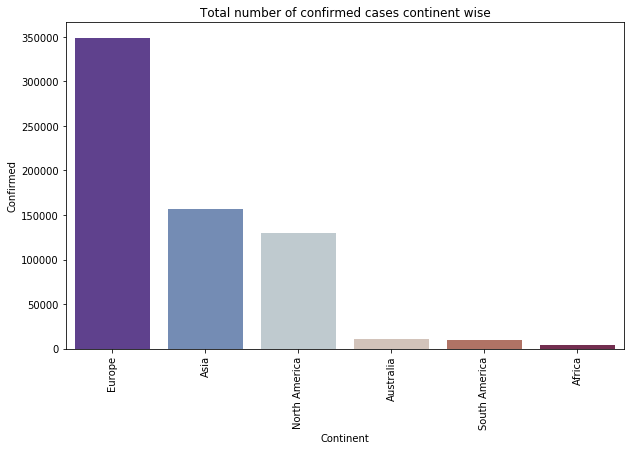

In [99]:
plt.figure(figsize = (10,6))
sb.barplot(data = no_of_confirmed_cases_continent_wise,x = no_of_confirmed_cases_continent_wise.index,y =no_of_confirmed_cases_continent_wise['Confirmed'], palette='twilight_shifted')
plt.title('Total number of confirmed cases continent wise')
plt.xticks(rotation = 90)


# Top number of deaths continent wise

In [93]:
no_of_deaths_continent_wise1 =data1.groupby(["Continent"]).agg({"Deaths":"max"}).reset_index().groupby("Continent").agg({"Deaths":"sum"}).sort_values(by = 'Deaths', ascending = False)

In [94]:
no_of_deaths_continent_wise2 = data2.groupby(['Continent',"Province"]).agg({"Deaths":"max"}).reset_index().groupby("Continent").agg({"Deaths":"sum"}).sort_values(by = "Deaths", ascending = False)
no_of_deaths_continent_wise2

,Deaths
Continent,
Asia,3299
North America,61
Australia,14


In [95]:
no_of_deaths_continent_wise = pd.concat((no_of_deaths_continent_wise1,no_of_deaths_continent_wise2), axis =0)

In [96]:
no_of_deaths_continent_wise = no_of_deaths_continent_wise.groupby("Continent").agg({"Deaths":'sum'}).sort_values(by = "Deaths", ascending = False)
no_of_deaths_continent_wise

,Deaths
Continent,
Europe,10023
Asia,5816
North America,2087
South America,111
Australia,50
Africa,36


# Top number of death cases continent wise visualization

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

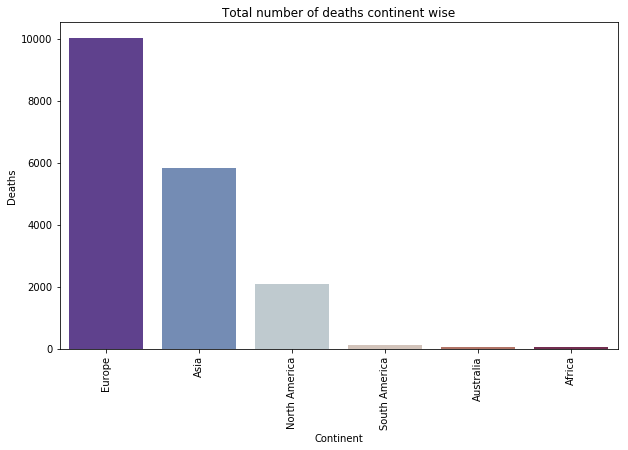

In [100]:
plt.figure(figsize = (10,6))
sb.barplot(data = no_of_deaths_continent_wise,x = no_of_deaths_continent_wise.index,y =no_of_deaths_continent_wise['Deaths'], palette='twilight_shifted')
plt.title("Total number of deaths continent wise")
plt.xticks(rotation = 90)

# Top number of recovered cases continent wise

In [103]:
no_of_recovered_continent_wise1 =data1.groupby(["Continent"]).agg({"Recovered":"max"}).reset_index().groupby("Continent").agg({"Recovered":"sum"}).sort_values(by = 'Recovered', ascending = False)

In [104]:
no_of_recovered_continent_wise2 = data2.groupby(['Continent',"Province"]).agg({"Recovered":"max"}).reset_index().groupby("Continent").agg({"Recovered":"sum"}).sort_values(by = "Recovered", ascending = False)
no_of_recovered_continent_wise2

,Recovered
Continent,
Asia,75100
Australia,244
North America,0


In [105]:
no_of_recovered_continent_wise = pd.concat((no_of_recovered_continent_wise1,no_of_recovered_continent_wise2), axis =0)

In [106]:
no_of_recovered_continent_wise = no_of_recovered_continent_wise.groupby("Continent").agg({"Recovered":'sum'}).sort_values(by = "Recovered", ascending = False)
no_of_recovered_continent_wise

,Recovered
Continent,
Asia,86779
Europe,12384
North America,1072
Australia,841
Africa,121
South America,72


# Top number of recovered cases continent wise visualization

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

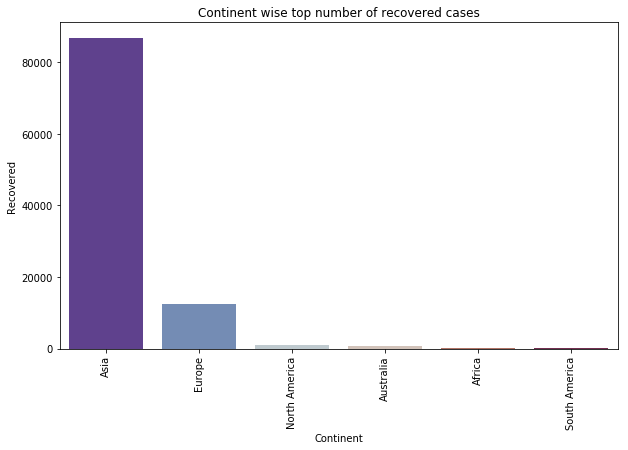

In [107]:
plt.figure(figsize=(10,6))
sb.barplot(data = no_of_recovered_continent_wise,x = no_of_recovered_continent_wise.index,y =no_of_recovered_continent_wise['Recovered'], palette='twilight_shifted')
plt.title("Continent wise top number of recovered cases")
plt.xticks(rotation = 90)

# Creating a new dataframe indicating all continent wise statistics like confirmed, deaths, recovered, deaths_percent, recovered_percent

In [108]:
total_stats_continent = pd.merge(no_of_confirmed_cases_continent_wise,no_of_deaths_continent_wise,on =no_of_confirmed_cases_continent_wise.index ).rename(columns = {"key_0":'Country'}).set_index("Country")
total_stats_continent
#.set_index("Key_0")

,Confirmed,Deaths
Country,,
Europe,348895,10023
Asia,156192,5816
North America,129939,2087
Australia,10529,111
South America,10156,50
Africa,4033,36


In [109]:
total_stats_continent = pd.merge(total_stats_continent,no_of_recovered_continent_wise,on =total_stats_continent.index )

In [110]:
total_stats_continent = total_stats_continent.rename(columns = {"key_0":'Country'}).set_index("Country")

In [111]:
total_stats_continent

,Confirmed,Deaths,Recovered
Country,,,
Europe,348895,10023,86779
Asia,156192,5816,12384
North America,129939,2087,1072
Australia,10529,111,841
South America,10156,50,121
Africa,4033,36,72


In [112]:
total_stats_continent['Death_Percent'] = (total_stats_continent['Deaths']/total_stats_continent['Confirmed'])*100

In [113]:
total_stats_continent['Recovered_Percent'] = (total_stats_continent['Recovered']/total_stats_continent['Confirmed'])*100

In [114]:
total_stats_continent

,Confirmed,Deaths,Recovered,Death_Percent,Recovered_Percent
Country,,,,,
Europe,348895,10023,86779,2.872784,24.872526
Asia,156192,5816,12384,3.723622,7.928703
North America,129939,2087,1072,1.606138,0.825003
Australia,10529,111,841,1.054231,7.987463
South America,10156,50,121,0.492320,1.191414
Africa,4033,36,72,0.892636,1.785272


# Total number of confirmed cases month wise

In [116]:
no_of_confirmed_cases_month_wise1 = data1.groupby(["month",'Country']).agg({"Confirmed":"max"}).reset_index().groupby('month').agg({"Confirmed":'sum'})

In [117]:
data2.head(10)

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day,Continent
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,1,22,Australia
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,1,22,Australia
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,1,22,Australia
11,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0,1,22,Australia
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,1,22,Australia
13,Tasmania,Australia,-41.4545,145.9707,2020-01-22,0,0,0,1,22,Australia
14,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0,1,22,Australia
15,Western Australia,Australia,-31.9505,115.8605,2020-01-22,0,0,0,1,22,Australia
35,Alberta,Canada,53.9333,-116.5765,2020-01-22,0,0,0,1,22,North America
36,British Columbia,Canada,49.2827,-123.1207,2020-01-22,0,0,0,1,22,North America


In [118]:
no_of_confirmed_cases_month_wise2 = data2.groupby(['month','Country','Province']).agg({"Confirmed":"max"}).reset_index().groupby("month").agg({'Confirmed':'sum'})

In [119]:
no_of_confirmed_cases_month_wise = pd.concat((no_of_confirmed_cases_month_wise1,no_of_confirmed_cases_month_wise2),axis = 0)

In [120]:
no_of_confirmed_cases_month_wise = no_of_confirmed_cases_month_wise.groupby("month").agg({"Confirmed":'sum'})

# Total number of confirmed cases month wise visualization in percentages

Text(0.5, 1.0, 'Percentage of cases of total in each month')

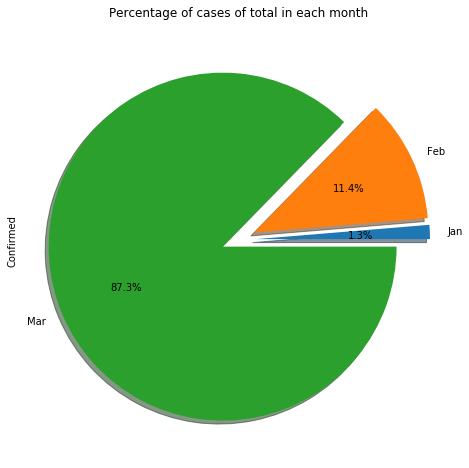

In [121]:
no_of_confirmed_cases_month_wise['Confirmed'].plot(kind = 'pie',autopct = '%1.1f%%',figsize = (8,8),shadow = True,explode = (0.1,0.1,0.1),labels = ['Jan','Feb','Mar'])
plt.title("Percentage of cases of total in each month")

In [155]:
no_of_confirmed_cases_month_wise

,Confirmed
month,
1,9928
2,86011
3,659744


In [122]:
lst = []
for i in range(1,len(no_of_confirmed_cases_month_wise['Confirmed'])+1):
    if(i != 1):
        lst.append(no_of_confirmed_cases_month_wise['Confirmed'][i] -no_of_confirmed_cases_month_wise['Confirmed'][i-1])
    else:
        lst.append(0)

In [123]:
lst

[0, 76083, 573733]

In [124]:
no_of_confirmed_cases_month_wise['Increase_in_cases'] = lst

In [125]:
no_of_confirmed_cases_month_wise.index = ['Jan',"Feb","Mar"]

In [126]:
no_of_confirmed_cases_month_wise

,Confirmed,Increase_in_cases
Jan,9928,0
Feb,86011,76083
Mar,659744,573733


In [127]:
lst = []
for i in range(0,len(no_of_confirmed_cases_month_wise)):
    lst.append((no_of_confirmed_cases_month_wise['Increase_in_cases'][i]/no_of_confirmed_cases_month_wise['Confirmed'][i-1])*100)

In [129]:
no_of_confirmed_cases_month_wise['Percent_increase_month_on_month'] = lst

In [130]:
no_of_confirmed_cases_month_wise

,Confirmed,Increase_in_cases,Percent_increase_month_on_month
Jan,9928,0,0.000000
Feb,86011,76083,766.347703
Mar,659744,573733,667.046076


# Total number of deaths month wise

In [131]:
no_of_deaths_month_wise1 = data1.groupby(["month",'Country']).agg({"Deaths":"max"}).reset_index().groupby('month').agg({"Deaths":'sum'})

In [132]:
no_of_deaths_month_wise2 = data2.groupby(['month','Country','Province']).agg({"Deaths":"max"}).reset_index().groupby("month").agg({'Deaths':'sum'})

In [133]:
no_of_deaths_month_wise = pd.concat((no_of_deaths_month_wise1,no_of_deaths_month_wise2),axis = 0)

In [134]:
no_of_deaths_month_wise = no_of_deaths_month_wise.groupby("month").agg({"Deaths":'sum'})

In [135]:
no_of_deaths_month_wise.head()

,Deaths
month,
1,213
2,2941
3,30652


Text(0.5, 1.0, 'Number of deaths month wise in percentages')

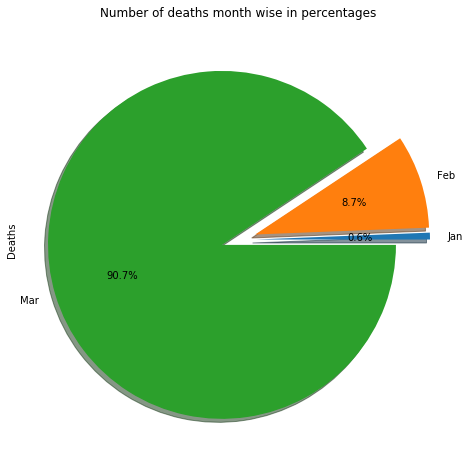

In [136]:
no_of_deaths_month_wise['Deaths'].plot(kind = 'pie',autopct = '%1.1f%%',figsize = (8,8),shadow = True,explode = (0.1,0.1,0.1),labels = ['Jan','Feb','Mar'])
plt.title("Number of deaths month wise in percentages")

In [137]:
lst = []
for i in range(1,len(no_of_deaths_month_wise['Deaths'])+1):
    if(i != 1):
        lst.append(no_of_deaths_month_wise['Deaths'][i] -no_of_deaths_month_wise['Deaths'][i-1])
    else:
        lst.append(0)

In [138]:
no_of_deaths_month_wise['Increase_in_deaths'] = lst

In [139]:
no_of_deaths_month_wise.index = ['Jan',"Feb","Mar"]

In [140]:
no_of_deaths_month_wise

,Deaths,Increase_in_deaths
Jan,213,0
Feb,2941,2728
Mar,30652,27711


In [141]:
lst = []
for i in range(0,len(no_of_deaths_month_wise)):
    lst.append((no_of_deaths_month_wise['Increase_in_deaths'][i]/no_of_deaths_month_wise['Deaths'][i-1])*100)

In [142]:
no_of_deaths_month_wise['Percent_increase_month_on_month'] = lst

In [143]:
no_of_deaths_month_wise

,Deaths,Increase_in_deaths,Percent_increase_month_on_month
Jan,213,0,0.000000
Feb,2941,2728,1280.751174
Mar,30652,27711,942.230534


# Number of deaths month wise visualization

Text(0.5, 1.0, 'Increase in deaths month wise')

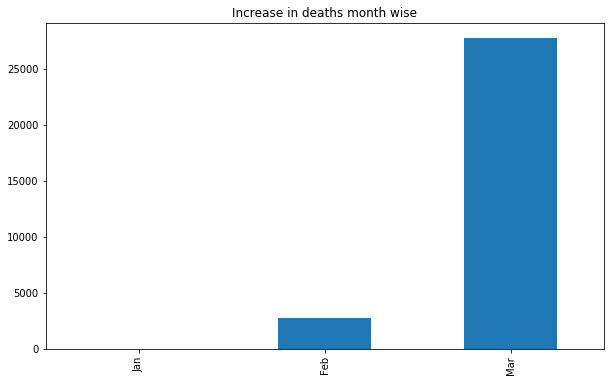

In [145]:
no_of_deaths_month_wise['Increase_in_deaths'].plot(kind = 'bar',figsize = (10,6))
plt.title("Increase in deaths month wise")

# Number of recovered cases month wise

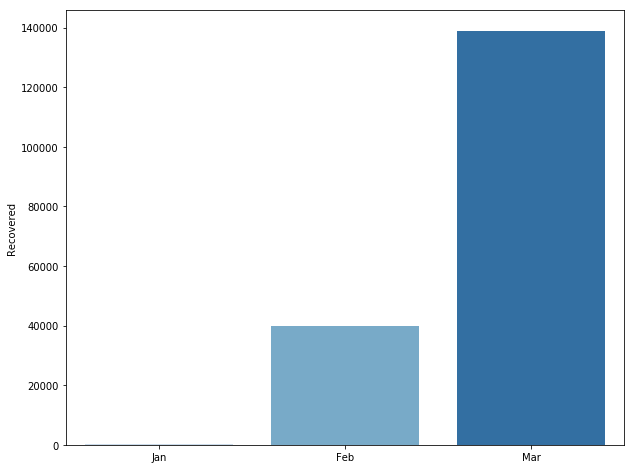

In [146]:
no_of_recovered_month_wise1 = data1.groupby(['month','Country']).agg({"Recovered":"max"}).reset_index().groupby(['month']).agg({"Recovered":'sum'})
no_of_recovered_month_wise1.head()
no_of_recovered_month_wise2 = data2.groupby(['month','Country','Province']).agg({"Recovered":"max"}).reset_index().groupby(['month']).agg({'Recovered':'sum'})
no_of_recovered_month_wise = pd.concat((no_of_recovered_month_wise1,no_of_recovered_month_wise2),axis = 0)
no_of_recovered_month_wise = no_of_recovered_month_wise.groupby(["month"]).agg({"Recovered":'sum'})
lst = []
for i in range(0,len(no_of_recovered_month_wise)):
    if(i != 0):
        lst.append(no_of_recovered_month_wise.reset_index()['Recovered'][i] - no_of_recovered_month_wise.reset_index()['Recovered'][i-1])
    else:
        lst.append(0)
no_of_recovered_month_wise['Increase_in_recovery'] = lst
lst = []
for i in range(0,len(no_of_recovered_month_wise)):
    if(i!=0):
        lst.append((no_of_recovered_month_wise.reset_index()['Increase_in_recovery'][i] / no_of_recovered_month_wise.reset_index()["Recovered"][i-1])*100)
    else:
        lst.append(0)
no_of_recovered_month_wise['Percent_Increase'] = lst
plt.figure(figsize = (10,8))
no_of_recovered_month_wise.index = ['Jan',"Feb","Mar"]
sb.barplot(data = no_of_recovered_month_wise,x =no_of_recovered_month_wise.index,y = no_of_recovered_month_wise['Recovered'],palette='Blues')
plt.xticks(rotation = 0)
plt.title = 'No_of_recovered_month_wise'

# Creating a new dataframe indicating all month wise statistics like confirmed, deaths, recovered, deaths_percent, recovered_percent

In [348]:
total_stats_months_wise= pd.concat((no_of_confirmed_cases_month_wise,no_of_deaths_month_wise),axis = 1)

In [349]:
total_stats_months_wise= pd.concat((total_stats_months_wise,no_of_recovered_month_wise),axis = 1)


In [350]:
total_stats_months_wise

,Confirmed,Increase_in_cases,Percent_increase_month_on_month,Deaths,Increase_in_deaths,Percent_increase_month_on_month,Recovered,Increase_in_recovery,Percent_Increase
Jan,9928,0,0.000000,213,0,0.000000,222,0,0.000000
Feb,86011,76083,766.347703,2941,2728,1280.751174,39776,39554,17817.117117
Mar,659744,573733,667.046076,30652,27711,942.230534,138966,99190,249.371480


# Number of confirmed cases day wise

In [147]:
no_of_confirmed_cases_day_wise1 = data1.groupby(["day",'Country']).agg({"Confirmed":"max"}).reset_index().groupby('day').agg({"Confirmed":'sum'})

In [148]:
no_of_confirmed_cases_day_wise2 = data2.groupby(['day','Country','Province']).agg({"Confirmed":"max"}).reset_index().groupby("day").agg({'Confirmed':'sum'})

In [149]:
no_of_confirmed_cases_day_wise = pd.concat((no_of_confirmed_cases_day_wise1,no_of_confirmed_cases_day_wise2),axis = 0)

In [151]:
no_of_confirmed_cases_day_wise = no_of_confirmed_cases_day_wise.groupby("day").agg({"Confirmed":'sum'})
no_of_confirmed_cases_day_wise.head()

,Confirmed
day,
1,88369
2,90306
3,92840
4,95115
5,97881


# Statistics of confirmed cases across all the countries every day since Jan 22

In [152]:
no_of_confirmed_cases_monthday_wise1 = data1.groupby(['month',"day",'Country']).agg({"Confirmed":"max"}).reset_index().groupby(['month',"day"]).agg({"Confirmed":'sum'})
no_of_confirmed_cases_monthday_wise1.head()

Confirmed
month day           
1     22           7
      23          11
      24          21
      25          28
      26          38

In [153]:
no_of_confirmed_cases_monthday_wise2 = data2.groupby(['month',"day",'Country','Province']).agg({"Confirmed":"max"}).reset_index().groupby(['month',"day"]).agg({'Confirmed':'sum'})

In [154]:
no_of_confirmed_cases_monthday_wise = pd.concat((no_of_confirmed_cases_monthday_wise1,no_of_confirmed_cases_monthday_wise2),axis = 0)

In [155]:
no_of_confirmed_cases_monthday_wise = no_of_confirmed_cases_monthday_wise.groupby(["month",'day']).agg({"Confirmed":'sum'})

In [156]:
no_of_confirmed_cases_monthday_wise.reset_index()

,month,day,Confirmed
0,1,22,555
1,1,23,654
2,1,24,941
3,1,25,1434
4,1,26,2118
5,1,27,2927
6,1,28,5578
7,1,29,6166
8,1,30,8234
9,1,31,9927


In [ ]:
#Finding the increase in confirmed cases every day

In [157]:
lst = []
for i in range(0,len(no_of_confirmed_cases_monthday_wise)):
    if(i != 0):
        lst.append(no_of_confirmed_cases_monthday_wise.reset_index()['Confirmed'][i] - no_of_confirmed_cases_monthday_wise.reset_index()['Confirmed'][i-1])
    else:
        lst.append(0)

In [158]:
no_of_confirmed_cases_monthday_wise.reset_index()['Confirmed'][10] - no_of_confirmed_cases_monthday_wise.reset_index()['Confirmed'][9]

2111

In [159]:
len(no_of_confirmed_cases_monthday_wise)

67

In [160]:
lst

[0,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 1927,
 13639,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2275,
 2766,
 3915,
 4039,
 3973,
 3769,
 5029,
 7252,
 2477,
 16841,
 10882,
 11344,
 14092,
 15481,
 17683,
 27635,
 29474,
 32296,
 32471,
 41221,
 39738,
 49518,
 61847,
 63595,
 67278]

In [161]:
no_of_confirmed_cases_monthday_wise['Increase_in_cases'] = lst

In [ ]:
#Finding the percentage increase in confirmed cases every day

In [162]:
lst = []
for i in range(0,len(no_of_confirmed_cases_monthday_wise)):
    if(i!=0):
        lst.append((no_of_confirmed_cases_monthday_wise.reset_index()['Increase_in_cases'][i] / no_of_confirmed_cases_monthday_wise.reset_index()['Confirmed'][i-1])*100)
    else:
        lst.append(0)

In [163]:
no_of_confirmed_cases_monthday_wise['Percent_Increase'] = lst

In [164]:
no_of_confirmed_cases_monthday_wise.head()

Confirmed  Increase_in_cases  Percent_Increase
month day                                                
1     22         555                  0          0.000000
      23         654                 99         17.837838
      24         941                287         43.883792
      25        1434                493         52.391073
      26        2118                684         47.698745

# Plots illustrating the increase in the confirmed cases since the 22nd of Jan

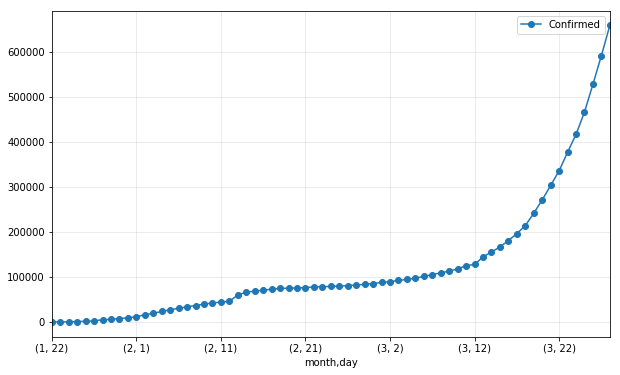

In [357]:
no_of_confirmed_cases_monthday_wise['Confirmed'].plot(figsize=(10,6),marker = 'o')
plt.legend()
plt.grid(alpha = 0.3)

In [344]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

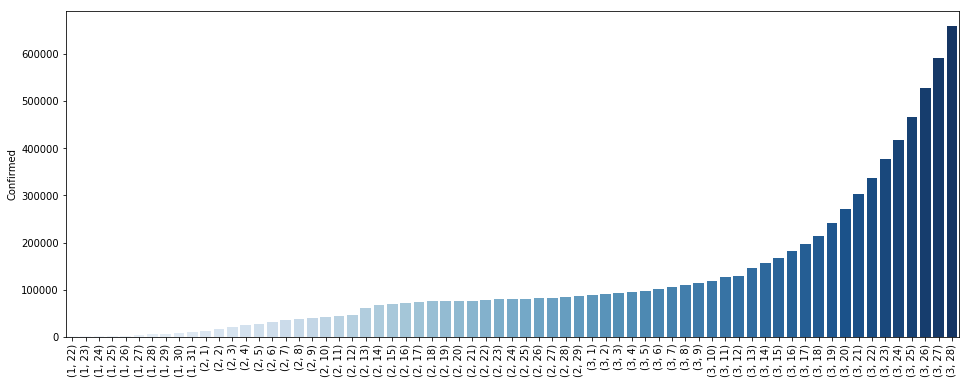

In [168]:
plt.figure(figsize = (16,6))
sb.barplot(data = no_of_confirmed_cases_monthday_wise,x =no_of_confirmed_cases_monthday_wise.index,y = no_of_confirmed_cases_monthday_wise['Confirmed'],palette='Blues')
plt.xticks(rotation = 90)

# Statistics of deaths across all the contries every day since 22 Jan

In [169]:
no_of_deaths_monthday_wise1 = data1.groupby(['month',"day",'Country']).agg({"Deaths":"max"}).reset_index().groupby(['month',"day"]).agg({"Deaths":'sum'})
no_of_deaths_monthday_wise1.head()

Deaths
month day        
1     22        0
      23        0
      24        0
      25        0
      26        0

In [170]:
no_of_deaths_monthday_wise2 = data2.groupby(['month',"day",'Country','Province']).agg({"Deaths":"max"}).reset_index().groupby(['month',"day"]).agg({'Deaths':'sum'})

In [171]:
no_of_deaths_monthday_wise = pd.concat((no_of_deaths_monthday_wise1,no_of_deaths_monthday_wise2),axis = 0)

In [172]:
no_of_deaths_monthday_wise = no_of_deaths_monthday_wise.groupby(["month",'day']).agg({"Deaths":'sum'})

In [173]:
lst = []
for i in range(0,len(no_of_deaths_monthday_wise)):
    if(i != 0):
        lst.append(no_of_deaths_monthday_wise.reset_index()['Deaths'][i] - no_of_deaths_monthday_wise.reset_index()['Deaths'][i-1])
    else:
        lst.append(0)

In [174]:
no_of_deaths_monthday_wise['Increase_in_deaths'] = lst

In [175]:
lst = []
for i in range(0,len(no_of_deaths_monthday_wise)):
    if(i!=0):
        lst.append((no_of_deaths_monthday_wise.reset_index()['Increase_in_deaths'][i] / no_of_deaths_monthday_wise.reset_index()['Deaths'][i-1])*100)
    else:
        lst.append(0)

In [176]:
no_of_deaths_monthday_wise['Percent_Increase'] = lst

In [177]:
no_of_deaths_monthday_wise.head()

Deaths  Increase_in_deaths  Percent_Increase
month day                                              
1     22       17                   0          0.000000
      23       18                   1          5.882353
      24       26                   8         44.444444
      25       42                  16         61.538462
      26       56                  14         33.333333

# Plots illustrating the increase in the deaths since the 22nd of Jan

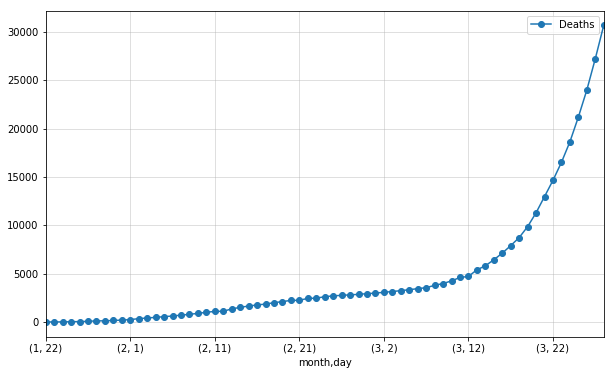

In [350]:
no_of_deaths_monthday_wise['Deaths'].plot(figsize=(10,6),marker = 'o')
plt.grid(alpha = 0.5)
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

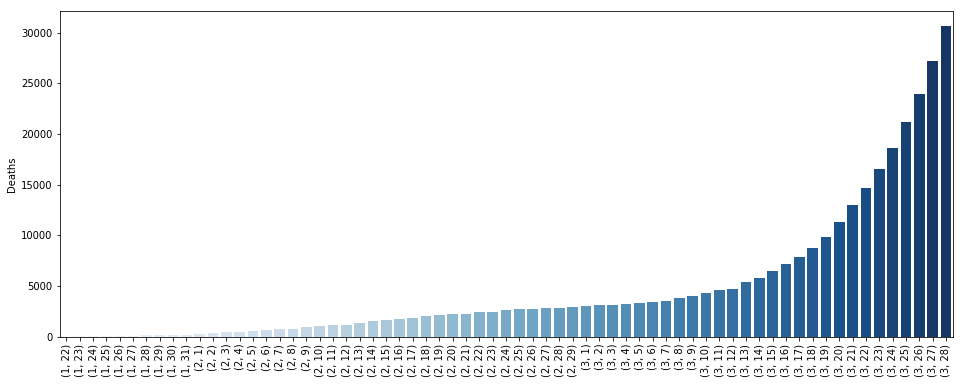

In [356]:
plt.figure(figsize = (16,6))
sb.barplot(data = no_of_deaths_monthday_wise,x =no_of_deaths_monthday_wise.index,y = no_of_deaths_monthday_wise['Deaths'],palette='Blues')
plt.xticks(rotation = 90)
#plt.title(("Total Deaths across all countries"),fontsize = 20)

# Statistics of recovered cases across all countries since 22nd Jan

In [180]:
no_of_recovered_monthday_wise1 = data1.groupby(['month',"day",'Country']).agg({"Recovered":"max"}).reset_index().groupby(['month',"day"]).agg({"Recovered":'sum'})
no_of_recovered_monthday_wise1.head()

Recovered
month day           
1     22           0
      23           0
      24           0
      25           0
      26           3

In [181]:
no_of_recovered_monthday_wise2 = data2.groupby(['month',"day",'Country','Province']).agg({"Recovered":"max"}).reset_index().groupby(['month',"day"]).agg({'Recovered':'sum'})

In [182]:
no_of_recovered_monthday_wise = pd.concat((no_of_recovered_monthday_wise1,no_of_recovered_monthday_wise2),axis = 0)

In [183]:
no_of_recovered_monthday_wise = no_of_recovered_monthday_wise.groupby(["month",'day']).agg({"Recovered":'sum'})

In [184]:
lst = []
for i in range(0,len(no_of_recovered_monthday_wise)):
    if(i != 0):
        lst.append(no_of_recovered_monthday_wise.reset_index()['Recovered'][i] - no_of_recovered_monthday_wise.reset_index()['Recovered'][i-1])
    else:
        lst.append(0)

In [ ]:
no_of_recovered_monthday_wise['Increase_in_recovery'] = lst

In [186]:
lst = []
for i in range(0,len(no_of_recovered_monthday_wise)):
    if(i!=0):
        lst.append((no_of_recovered_monthday_wise.reset_index()['Increase_in_recovery'][i] / no_of_recovered_monthday_wise.reset_index()["Recovered"][i-1])*100)
    else:
        lst.append(0)

In [187]:
no_of_recovered_monthday_wise['Percent_Increase'] = lst

# Plots illustrating the increase in recoveries

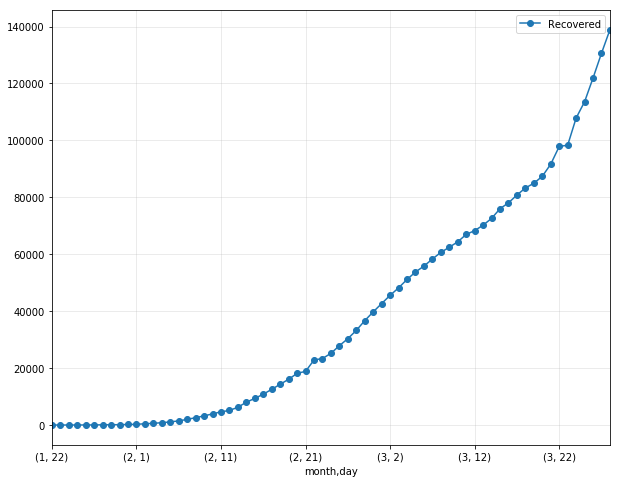

In [432]:
no_of_recovered_monthday_wise['Recovered'].plot(figsize=(10,8),marker = 'o')
plt.grid(alpha = 0.3)
plt.legend()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

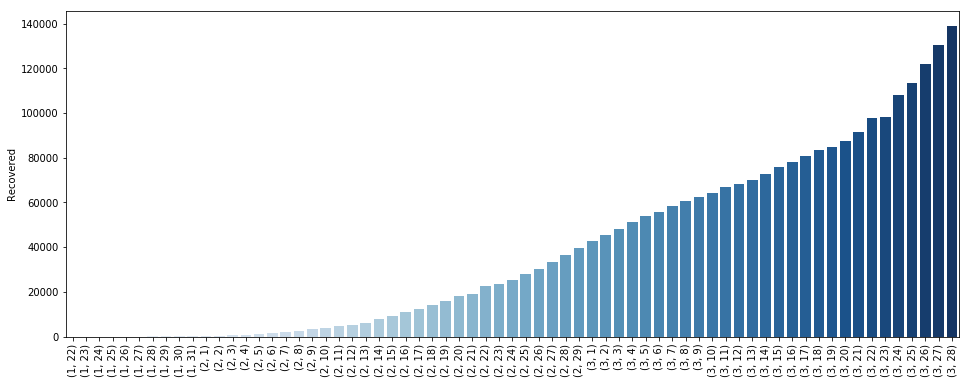

In [189]:
plt.figure(figsize = (16,6))
sb.barplot(data = no_of_recovered_monthday_wise,x =no_of_recovered_monthday_wise.index,y = no_of_recovered_monthday_wise['Recovered'],palette='Blues')
plt.xticks(rotation = 90)

# Creating a total stats dataframe indicating the number of new cases that came in, no of deaths, no of recovered cases each day since 22nd Jan

In [190]:
total_stats_monthday_wise= pd.concat((no_of_confirmed_cases_monthday_wise,no_of_deaths_monthday_wise),axis = 1)

In [192]:
total_stats_monthday_wise= pd.concat((total_stats_monthday_wise,no_of_recovered_monthday_wise),axis = 1)

In [193]:
total_stats_monthday_wise.head()

Confirmed  Increase_in_cases  Percent_Increase  Deaths  \
month day                                                           
1     22         555                  0          0.000000      17   
      23         654                 99         17.837838      18   
      24         941                287         43.883792      26   
      25        1434                493         52.391073      42   
      26        2118                684         47.698745      56   

           Increase_in_deaths  Percent_Increase  Recovered  \
month day                                                    
1     22                    0          0.000000         28   
      23                    1          5.882353         30   
      24                    8         44.444444         36   
      25                   16         61.538462         39   
      26                   14         33.333333         52   

           Increase_in_recovery  Percent_Increase  
month day                                          
1     22                      0          0.000000  
      23                      2          7.142857  
      24                      6         20.000000  
      25                      3          8.333333  
      26                     13         33.333333

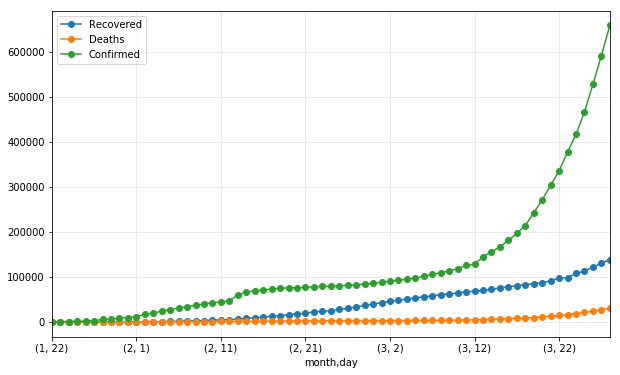

In [364]:
no_of_recovered_monthday_wise['Recovered'].plot(figsize=(10,8),marker = 'o')
plt.grid(alpha = 0.3)
plt.legend()


no_of_deaths_monthday_wise['Deaths'].plot(figsize=(10,6),marker = 'o')
plt.grid(alpha = 0.5)
plt.legend()

no_of_confirmed_cases_monthday_wise['Confirmed'].plot(figsize=(10,6),marker = 'o')
plt.legend()
plt.grid(alpha = 0.3)

plt.show()

# Progression of confirmed cases each day in different countries

In [194]:
no_of_confirmed_cases_cmonthday_wise1 = data1.groupby(['Country','month',"day"]).agg({"Confirmed":"max"}).reset_index().groupby(['Country','month',"day"]).agg({"Confirmed":'sum'})
no_of_confirmed_cases_cmonthday_wise1.head()

Confirmed
Country     month day           
Afghanistan 1     22           0
                  23           0
                  24           0
                  25           0
                  26           0

In [195]:
no_of_confirmed_cases_cmonthday_wise2 = data2.groupby(['Country','month',"day",'Province']).agg({"Confirmed":"max"}).reset_index().groupby(["Country",'month',"day"]).agg({'Confirmed':'sum'})

In [196]:
no_of_confirmed_cases_cmonthday_wise = pd.concat((no_of_confirmed_cases_cmonthday_wise1,no_of_confirmed_cases_cmonthday_wise2),axis = 0)

In [197]:
no_of_confirmed_cases_cmonthday_wise = no_of_confirmed_cases_cmonthday_wise.groupby(["Country","month",'day']).agg({"Confirmed":'sum'})

In [200]:
no_of_confirmed_cases_cmonthday_wise.reset_index().set_index(['Country','day']).head()

month  Confirmed
Country     day                  
Afghanistan 22       1          0
            23       1          0
            24       1          0
            25       1          0
            26       1          0

In [203]:
no_of_deaths_cmonthday_wise1 = data1.groupby(['Country','month',"day"]).agg({"Deaths":"max"}).reset_index().groupby(["Country",'month',"day"]).agg({"Deaths":'sum'})
no_of_deaths_cmonthday_wise1.head()

Deaths
Country     month day        
Afghanistan 1     22        0
                  23        0
                  24        0
                  25        0
                  26        0

In [205]:
no_of_deaths_cmonthday_wise2 = data2.groupby(['Country','month',"day",'Province']).agg({"Deaths":"max"}).reset_index().groupby(["Country",'month',"day"]).agg({'Deaths':'sum'})

In [206]:
no_of_deaths_cmonthday_wise = pd.concat((no_of_deaths_cmonthday_wise1,no_of_deaths_cmonthday_wise2),axis = 0)

In [207]:
no_of_deaths_cmonthday_wise = no_of_deaths_cmonthday_wise.groupby(["Country","month",'day']).agg({"Deaths":'sum'})

In [209]:
no_of_recovered_cmonthday_wise1 = data1.groupby(['Country','month',"day"]).agg({"Recovered":"max"}).reset_index().groupby(["Country",'month',"day"]).agg({"Recovered":'sum'})
no_of_recovered_cmonthday_wise1.head()

Recovered
Country     month day           
Afghanistan 1     22           0
                  23           0
                  24           0
                  25           0
                  26           0

In [210]:
no_of_recovered_cmonthday_wise2 = data2.groupby(['Country','month',"day",'Province']).agg({"Recovered":"max"}).reset_index().groupby(["Country",'month',"day"]).agg({'Recovered':'sum'})

In [211]:
no_of_recovered_cmonthday_wise = pd.concat((no_of_recovered_cmonthday_wise1,no_of_recovered_cmonthday_wise2),axis = 0)

In [212]:
no_of_recovered_cmonthday_wise = no_of_recovered_cmonthday_wise.groupby(["Country","month",'day']).agg({"Recovered":'sum'})

In [214]:
no_of_recovered_cmonthday_wise.head()

Recovered
Country     month day           
Afghanistan 1     22           0
                  23           0
                  24           0
                  25           0
                  26           0

# Creating a new data frame illustrating no of confirmed cases, deaths, recovered, fresh cases, deaths in the last 24 hours, recovered in the last 24 hrs

In [221]:
total_stats_day_wise = pd.concat((pd.concat((no_of_confirmed_cases_cmonthday_wise,no_of_deaths_cmonthday_wise),axis =1),no_of_recovered_cmonthday_wise),axis =1)

In [222]:
total_stats_day_wise.head()

Confirmed  Deaths  Recovered
Country     month day                              
Afghanistan 1     22           0       0          0
                  23           0       0          0
                  24           0       0          0
                  25           0       0          0
                  26           0       0          0

In [232]:
lst = []
for i in range(0,len(total_stats_day_wise)):
    if(i != 0):
        lst.append(total_stats_day_wise["Confirmed"][i] - total_stats_day_wise['Confirmed'][i-1])
    else:
        lst.append(0)
#lst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 4,
 5,
 5,
 1,
 0,
 0,
 2,
 0,
 16,
 0,
 34,
 10,
 10,
 16,
 0,
 -110,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 8,
 2,
 11,
 10,
 5,
 4,
 9,
 4,
 4,
 5,
 6,
 6,
 13,
 15,
 19,
 23,
 28,
 12,
 11,
 -197,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 7,
 0,
 5,
 0,
 2,
 1,
 0,
 0,
 4,
 2,
 11,
 11,
 6,
 6,
 14,
 13,
 3,
 49,
 62,
 29,
 34,
 38,
 65,
 42,
 45,
 -454,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [227]:
total_stats_day_wise.loc["India"].head()

Confirmed  Deaths  Recovered
month day                              
1     22           0       0          0
      23           0       0          0
      24           0       0          0
      25           0       0          0
      26           0       0          0

In [228]:
total_stats_day_wise['Active_cases'] = total_stats_day_wise['Confirmed'] - (total_stats_day_wise['Deaths']+total_stats_day_wise['Recovered'])

In [434]:
total_stats_day_wise.loc["India"].head()

Confirmed  Deaths  Recovered  Active_cases  Fresh_cases  \
month day                                                            
1     22           0       0          0             0            0   
      23           0       0          0             0            0   
      24           0       0          0             0            0   
      25           0       0          0             0            0   
      26           0       0          0             0            0   

           Deaths_last_24hrs  Reccovered_last_24hrs  
month day                                            
1     22                   0                      0  
      23                   0                      0  
      24                   0                      0  
      25                   0                      0  
      26                   0                      0

In [233]:
total_stats_day_wise['Fresh_cases'] = lst

In [435]:
total_stats_day_wise.loc['India'].head()

Confirmed  Deaths  Recovered  Active_cases  Fresh_cases  \
month day                                                            
1     22           0       0          0             0            0   
      23           0       0          0             0            0   
      24           0       0          0             0            0   
      25           0       0          0             0            0   
      26           0       0          0             0            0   

           Deaths_last_24hrs  Reccovered_last_24hrs  
month day                                            
1     22                   0                      0  
      23                   0                      0  
      24                   0                      0  
      25                   0                      0  
      26                   0                      0

In [ ]:
#The first row of every new country has to have the number of fresh cases as 0. Hence making the necessary changes

In [309]:
lst= []
for i in total_stats_day_wise['Fresh_cases']:
    if(i <0):
        lst.append(0)
    else:
        lst.append(i)

In [310]:
total_stats_day_wise.Fresh_cases = lst

In [436]:
total_stats_day_wise.loc['India'].head()

Confirmed  Deaths  Recovered  Active_cases  Fresh_cases  \
month day                                                            
1     22           0       0          0             0            0   
      23           0       0          0             0            0   
      24           0       0          0             0            0   
      25           0       0          0             0            0   
      26           0       0          0             0            0   

           Deaths_last_24hrs  Reccovered_last_24hrs  
month day                                            
1     22                   0                      0  
      23                   0                      0  
      24                   0                      0  
      25                   0                      0  
      26                   0                      0

In [321]:
lst = []
for i in range(0,len(total_stats_day_wise)):
    if(i != 0):
        lst.append(total_stats_day_wise["Recovered"][i] - total_stats_day_wise['Recovered'][i-1])
    else:
        lst.append(0)
lst2 = []
for i in lst:
    if(i<0):
        lst2.append(0)
    else:
        lst2.append(i)

In [322]:
lst1 = []
for i in range(0,len(total_stats_day_wise)):
    if(i != 0):
        lst1.append(total_stats_day_wise["Deaths"][i] - total_stats_day_wise['Deaths'][i-1])
    else:
        lst1.append(0)
lst3 = []
for i in lst1:
    if(i<0):
        lst3.append(0)
    else:
        lst3.append(i)

In [325]:
total_stats_day_wise['Deaths_last_24hrs'] = lst3
total_stats_day_wise['Reccovered_last_24hrs'] = lst2

In [331]:
total_stats_day_wise.loc['US'].tail()

Confirmed  Deaths  Recovered  Active_cases  Fresh_cases  \
month day                                                            
3     24       53740     706        348         52686         9893   
      25       65778     942        361         64475        12038   
      26       83836    1209        681         81946        18058   
      27      101657    1581        869         99207        17821   
      28      121478    2026       1072        118380        19821   

           Deaths_last_24hrs  Reccovered_last_24hrs  
month day                                            
3     24                 149                    170  
      25                 236                     13  
      26                 267                    320  
      27                 372                    188  
      28                 445                    203

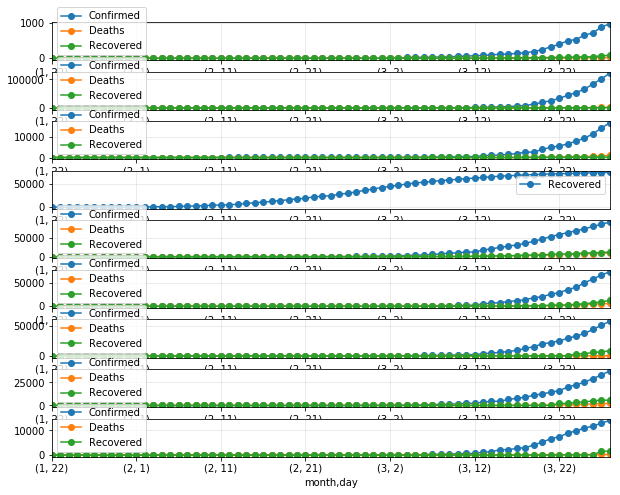

In [430]:
plt.figure(figsize=(25,5))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

plt.subplot(911)
total_stats_day_wise.loc['India']['Confirmed'].plot(marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['India']['Deaths'].plot(marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['India']['Recovered'].plot(marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(912)
total_stats_day_wise.loc["US"]['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.grid(alpha = 0.5)
plt.legend()
total_stats_day_wise.loc['US']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['US']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(913)
total_stats_day_wise.loc['United Kingdom']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.legend()
plt.grid(alpha = 0.3)
total_stats_day_wise.loc['United Kingdom']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['United Kingdom']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(914)

total_stats_day_wise.loc['China']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(915)
total_stats_day_wise.loc['Italy']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.legend()
plt.grid(alpha = 0.3)
total_stats_day_wise.loc['Italy']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['Italy']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(916)
total_stats_day_wise.loc['Spain']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.legend()
plt.grid(alpha = 0.3)
total_stats_day_wise.loc['Spain']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['Spain']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(917)
total_stats_day_wise.loc['Germany']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.legend()
plt.grid(alpha = 0.3)
total_stats_day_wise.loc['Germany']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['Germany']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(918)
total_stats_day_wise.loc['France']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.legend()
plt.grid(alpha = 0.3)
total_stats_day_wise.loc['France']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['France']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()

plt.subplot(919)
total_stats_day_wise.loc['Switzerland']['Confirmed'].plot(figsize=(10,6),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['Switzerland']['Deaths'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()
total_stats_day_wise.loc['Switzerland']['Recovered'].plot(figsize=(10,8),marker ='o')
plt.grid(alpha = 0.3)
plt.legend()


plt.show()
